In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Problem Statement:
Build models to predict churn. So, that it will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.


### Steps
- Reading and Exploring data
- Data Preprocessing
- Feature Engineering
- Model Building
- Model Evaluation

### Data Dictionary for Ease

| Columns | Descriptions |
|---|---|
|MOBILE_NUMBER |  Customer phone number |
|CIRCLE_ID | Telecom circle area to which the customer belongs to |
|LOC    | Local calls - within same telecom circle |
|STD    | STD calls - outside the calling circle |
|IC     | Incoming calls |
|OG     | Outgoing calls |
|T2T    | Operator T to T, i.e. within same operator (mobile to mobile)|
|T2M    | Operator T to other operator mobile|
|T2O    | Operator T to other operator fixed line|
|T2F    | Operator T to fixed lines of T|
|T2C    | Operator T to it’s own call center|
|ARPU   | Average revenue per user|
|MOU    | Minutes of usage - voice calls|
|AON    | Age on network - number of days the customer is using the operator T network|
|ONNET  | All kind of calls within the same operator network|
|OFFNET | All kind of calls outside the operator T network|
|ROAM   | Indicates that customer is in roaming zone during the call|
|SPL    | Special calls|
|ISD    | ISD calls|
|RECH   | Recharge|
|NUM    | Number|
|AMT    | Amount in local currency|
|MAX    | Maximum|
|DATA   | Mobile internet|
|3G     | 3G network|
|AV     | Average|
|VOL    | Mobile internet usage volume (in MB)|
|2G     | 2G network|
|PCK    | Prepaid service schemes called - PACKS|
|NIGHT  | Scheme to use during specific night hours only|
|MONTHLY| Service schemes with validity equivalent to a month|
|SACHET | Service schemes with validity smaller than a month|
|*.6    | KPI for the month of June|
|*.7    | KPI for the month of July|
|*.8    | KPI for the month of August|
|*.9    | KPI for the month of September|
|FB_USER | Service scheme to avail services of Facebook and similar social networking sites|
|VBC    | Volume based cost - when no specific scheme is not purchased and paid as per usage|

## Importing and Reading data

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [3]:
churn_data = pd.read_csv('/content/drive/MyDrive/Techvantage Analytica/Mini_Projects/Mini_Project_1/telecom_churn_data.csv')

### Data Preprocessing

In [4]:
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [5]:
# To check the number of rows and columns in our dataset
churn_data.shape

(99999, 226)

In [6]:
pd.options.display.max_columns = 180
pd.options.display.max_rows = 180

In [7]:
churn_data.nunique()

mobile_number     99999
circle_id             1
loc_og_t2o_mou        1
std_og_t2o_mou        1
loc_ic_t2o_mou        1
                  ...  
aon                3489
aug_vbc_3g        14676
jul_vbc_3g        14162
jun_vbc_3g        13312
sep_vbc_3g         3720
Length: 226, dtype: int64

from the above analysis it can be seen that few columns having same values for each values and also columns having unique values for each rows. These columns are less impacting for model building or analysis.
Remove these columns from dataset 

In [8]:
#Create and drop columns having distinct values for each rows/entry
def remove_distinct(df):
    return [e for e in df.columns if df[e].nunique() == df.shape[0]]
dist_col = remove_distinct(churn_data)

#Create and drop columns having nique values for each rows/entry
def nunique_col(df):
  return [i for i in df.columns if df[i].nunique() == 1]
same_val_col = nunique_col(churn_data)

churn_data.drop(columns=same_val_col, axis=1, inplace=True)  # drop columns
churn_data.drop(columns=dist_col, axis=1, inplace=True)  #drop columns

In [9]:
# To check the name of columns
print("Columns with Distinct Values:", dist_col)
print("Columns with same Values:", same_val_col)

Columns with Distinct Values: ['mobile_number']
Columns with same Values: ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [10]:
#Imputing null values for required columns
var = churn_data[['count_rech_2g_6', 'count_rech_3g_6','av_rech_amt_data_6', 'av_rech_amt_data_7']].fillna(0)

In [11]:
# Creating new columns/ adding new features in the dataset for further analysis
churn_data['avg_usage'] = (var['av_rech_amt_data_6'] + var['av_rech_amt_data_7'])/2
churn_data[['av_rech_amt_data_6', 'av_rech_amt_data_7', 'avg_usage']].head()

,av_rech_amt_data_6,av_rech_amt_data_7,avg_usage
0,252.0,252.0,252.0
1,NaN,154.0,77.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,56.0,NaN,28.0


In [12]:
# Check the value of 70%
churn_data['avg_usage'].quantile(0.7)

12.5

Now, looking for only those users falling beyond 70th percentile

In [13]:
df = churn_data[churn_data['avg_usage'] >= churn_data.avg_usage.quantile(0.7)]

In [14]:
df.shape

(30378, 210)

After filtering the users, we have only 30378 records.

Now checking the nll values for rows and making a strategy to drop rows having morethan 50% null values.

In [15]:
df.dropna(thresh=df.shape[1]//2, axis=0, inplace=True)

In [16]:
df.shape

(29695, 210)

Finally, I have only 29695 entries to work with. Before moving further, tag 1 for churn and 0 for active or have generated revenue for september month. 

In [17]:
df['churn'] = np.where(df[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].eq(0).all(axis=1), 1, 0)
df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,...,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_usage,churn
0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,...,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.0,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58,252.0,1
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.0,0.0,0.0,0.00,0.0,2.91,0.00,0.0,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.0,0.0,0.0,0.00,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.0,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.0,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.0,0.00,...,9,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/

Now still we have few columns which is not required like september month entries, and colmns having date same for each. Dropping those columns

In [18]:
col_9 = [i for i in df.columns if '_9' in i]
df.drop(columns=col_9, axis=1, inplace=True)

In [19]:
col_date = [i for i in df.columns if 'date' in i]
df.drop(columns=col_date, axis=1, inplace=True)
df.shape

(29695, 154)

In [20]:
# Check the percentage of null values for columns
(round(((df.isna().sum()) / df.shape[0])*100, 2)).to_frame('x').sort_values('x', ascending=False)

,x
arpu_3g_8,31.82
fb_user_8,31.82
arpu_2g_8,31.82
total_rech_data_8,31.82
night_pck_user_8,31.82
av_rech_amt_data_8,31.82
max_rech_data_8,31.82
count_rech_3g_8,31.82
count_rech_2g_8,31.82
count_rech_3g_6,20.33


In [21]:
print(df.fb_user_6.value_counts())
print(df.fb_user_6.isna().sum())
print(" ")
print(df.fb_user_7.value_counts())
print(df.fb_user_7.isna().sum())
print(" ")
print(df.fb_user_8.value_counts())
print(df.fb_user_8.isna().sum())

1.0    21782
0.0     1875
Name: fb_user_6, dtype: int64
6038
 
1.0    22259
0.0     2079
Name: fb_user_7, dtype: int64
5357
 
1.0    19065
0.0     1181
Name: fb_user_8, dtype: int64
9449


In [22]:
print(df.night_pck_user_6.value_counts())
print(df.night_pck_user_6.isna().sum())
print(" ")
print(df.night_pck_user_7.value_counts())
print(df.night_pck_user_7.isna().sum())
print(" ")
print(df.night_pck_user_8.value_counts())
print(df.night_pck_user_8.isna().sum())

0.0    23168
1.0      489
Name: night_pck_user_6, dtype: int64
6038
 
0.0    23886
1.0      452
Name: night_pck_user_7, dtype: int64
5357
 
0.0    19866
1.0      380
Name: night_pck_user_8, dtype: int64
9449


The above columns seems to be categorical and having null values too. Fill nll values with new values (2).

In [23]:
cols = ['night_pck_user_8', 'night_pck_user_7', 'night_pck_user_6',
        'fb_user_8', 'fb_user_7', 'fb_user_6']

df[cols] = df[cols].fillna(2)

In [24]:
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_usage,churn
0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,1
1,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.0,0.0,0.0,0.0,0.0,23.88,74.56,7.68,11.51,75.94,291.86,0.0,0.0,0.0,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.0,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.0,8.93,3.61,19.09,104.23,408.43,0.0,0.00,2.35,5.90,0.00,12.49,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,0.0,0.0,0.0,1.83,0.00,0.00,0.00,0.0,0.0,4,9,11,74,384,283,44,154,65,44,23,30,NaN,1.0,2.0,NaN,154.0,25.0,NaN,1.0,2.0,NaN,0.0,0.0,NaN,154.0,50.0,0.00,108.07,365.47,0.00,0.00,0.00,NaN,0.00,0.00,NaN,28.61,7.60,2.0,0.0,0.0,0,1,0,0,0,2,0,0,0,0,0,0,2.0,1.0,1.0,1006,0.00,0.00,0.00,0.00,77.0,0
4,261.636,309.876,238.174,50.31,149.44,83.89,76.96,91.88,124.26,0.0,0.0,0.0,0.0,0.0,0.0,50.31,149.44,83.89,67.64,91.88,124.26,0.0,0.0,0.0,0.0,0.00,0.00,117.96,241.33,208.16,0.00,0.00,0.00,9.31,0.00,0.00,0.0,0.0,0.0,9.31,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,127.28,241.33,208.16,105.68,88.49,233.81,106.84,109.54,104.13,1.5,0.00,0.00,214.03,198.04,337.94,0.0,0.00,0.86,1.93,0.25,0.00,0.0,0.0,0

In [25]:
print(df.fb_user_6.value_counts())
print(df.fb_user_6.isna().sum())
print(" ")
print(df.fb_user_7.value_counts())
print(df.fb_user_7.isna().sum())
print(" ")
print(df.fb_user_8.value_counts())
print(df.fb_user_8.isna().sum())

1.0    21782
2.0     6038
0.0     1875
Name: fb_user_6, dtype: int64
0
 
1.0    22259
2.0     5357
0.0     2079
Name: fb_user_7, dtype: int64
0
 
1.0    19065
2.0     9449
0.0     1181
Name: fb_user_8, dtype: int64
0


In [26]:
print(df.night_pck_user_6.value_counts())
print(df.night_pck_user_6.isna().sum())
print(" ")
print(df.night_pck_user_7.value_counts())
print(df.night_pck_user_7.isna().sum())
print(" ")
print(df.night_pck_user_8.value_counts())
print(df.night_pck_user_8.isna().sum())

0.0    23168
2.0     6038
1.0      489
Name: night_pck_user_6, dtype: int64
0
 
0.0    23886
2.0     5357
1.0      452
Name: night_pck_user_7, dtype: int64
0
 
0.0    19866
2.0     9449
1.0      380
Name: night_pck_user_8, dtype: int64
0


Values are imputed and next is to convert these columns into categorical and dummify.

In [27]:
df[cols] = df[cols].astype(object)
df[cols].dtypes

night_pck_user_8    object
night_pck_user_7    object
night_pck_user_6    object
fb_user_8           object
fb_user_7           object
fb_user_6           object
dtype: object

In [28]:
cols = ['night_pck_user_8', 'night_pck_user_7', 'night_pck_user_6',
        'fb_user_8', 'fb_user_7', 'fb_user_6']

df = pd.get_dummies(df,columns=cols, drop_first=True)
df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_usage,churn,night_pck_user_8_1.0,night_pck_user_8_2.0,night_pck_user_7_1.0,night_pck_user_7_2.0,night_pck_user_6_1.0,night_pck_user_6_2.0,fb_user_8_1.0,fb_user_8_2.0,fb_user_7_1.0,fb_user_7_2.0,fb_user_6_1.0,fb_user_6_2.0
0,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,1,0,0,0,0,0,0,1,0,1,0,1,0
1,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.0,0.0,0.0,0.0,0.0,23.88,74.56,7.68,11.51,75.94,291.86,0.0,0.0,0.0,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.0,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.0,8.93,3.61,19.09,104.23,408.43,0.0,0.00,2.35,5.90,0.00,12.49,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,0.0,0.0,0.0,1.83,0.00,0.00,0.00,0.0,0.0,4,9,11,74,384,283,44,154,65,44,23,30,NaN,1.0,2.0,NaN,154.0,25.0,NaN,1.0,2.0,NaN,0.0,0.0,NaN,154.0,50.0,0.00,108.07,365.47,0.00,0.00,0.00,NaN,0.00,0.00,NaN,28.61,7.60,0,1,0,0,0,2,0,0,0,0,0,0,1006,0.00,0.00,0.00,0.00,77.0,0,0,0,0,0,0,1,1,0,1,0,0,1
4,261.636,309.876,238.174,50.31,149.44,83.89,76.96,91.88,124.26,0.0,0.0,0.0,0.0,0.0,0.0,50.31,149.44,83.89,67.64,91.88,124.26,0.0,0.0,0.0,0.0,0.00,0.00,117.96,241.33,208.16,0.00,0.00,0.00,9.31,0.00,0.00,0.0,0.0,0.0,9.31,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,127.28

Filling rest null values with 0

In [29]:
df.fillna(0, inplace=True)
df.isna().sum().sort_values()

arpu_6                  0
total_rech_data_6       0
total_rech_data_7       0
total_rech_data_8       0
max_rech_data_6         0
max_rech_data_7         0
max_rech_data_8         0
count_rech_2g_6         0
last_day_rch_amt_8      0
count_rech_2g_7         0
count_rech_3g_6         0
count_rech_3g_7         0
count_rech_3g_8         0
av_rech_amt_data_6      0
av_rech_amt_data_7      0
av_rech_amt_data_8      0
vol_2g_mb_6             0
count_rech_2g_8         0
vol_2g_mb_7             0
last_day_rch_amt_7      0
max_rech_amt_8          0
spl_ic_mou_7            0
spl_ic_mou_8            0
isd_ic_mou_6            0
isd_ic_mou_7            0
isd_ic_mou_8            0
ic_others_6             0
ic_others_7             0
last_day_rch_amt_6      0
ic_others_8             0
total_rech_num_7        0
total_rech_num_8        0
total_rech_amt_6        0
total_rech_amt_7        0
total_rech_amt_8        0
max_rech_amt_6          0
max_rech_amt_7          0
total_rech_num_6        0
spl_ic_mou_6

### Feature Engineering

seperating dependent and independent variables for model building and training

In [30]:
X = df.drop(['churn'], axis=1)
y = df.churn
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_usage,night_pck_user_8_1.0,night_pck_user_8_2.0,night_pck_user_7_1.0,night_pck_user_7_2.0,night_pck_user_6_1.0,night_pck_user_6_2.0,fb_user_8_1.0,fb_user_8_2.0,fb_user_7_1.0,fb_user_7_2.0,fb_user_6_1.0,fb_user_6_2.0
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.0,0.00,1.15,0.00,0.00,5.44,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,0,0,0,0,0,0,1,0,1,0,1,0
1,34.047,355.074,268.321,24.11,78.68,7.68,15.74,99.84,304.76,0.0,0.0,0.0,0.0,0.0,0.0,23.88,74.56,7.68,11.51,75.94,291.86,0.0,0.0,0.0,0.0,2.91,0.00,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.0,0.0,0.0,0.23,4.58,0.13,0.0,0.0,0.0,4.68,23.43,12.76,0.0,0.0,0.0,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.0,8.93,3.61,19.09,104.23,408.43,0.0,0.00,2.35,5.90,0.00,12.49,0.0,0.0,0.0,5.90,0.00,14.84,26.83,104.23,423.28,0.0,0.0,0.0,1.83,0.00,0.00,0.00,0.0,0.0,4,9,11,74,384,283,44,154,65,44,23,30,0.0,1.0,2.0,0.0,154.0,25.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,154.0,50.0,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.61,7.60,0,1,0,0,0,2,0,0,0,0,0,0,1006,0.00,0.00,0.00,0.00,77.0,0,0,0,0,0,1,1,0,1,0,0,1
4,261.636,309.876,238.174,50.31,149.44,83.89,76.96,91.88,124.26,0.0,0.0,0.0,0.0,0.0,0.0,50.31,149.44,83.89,67.64,91.88,124.26,0.0,0.0,0.0,0.0,0.00,0.00,117.96,241.33,208.16,0.00,0.00,0.00,9.31,0.00,0.00,0.0,0.0,0.0,9.31,0.00,0.00,0.0,0.0,0.0,0.00,0.

In [31]:
Counter(y)

Counter({0: 27585, 1: 2110})

### Treating Imbalance Class

Dataset is having imbalance classes. To treat them there are many methods but I will follow hybrid method such as unersample and oversample using scikit-learn library.

In [32]:
smt = SMOTETomek(sampling_strategy=0.4, random_state=42)
X_res, y_res = smt.fit_resample(X, y)
Counter(y_res)

Counter({0: 27553, 1: 11002})

Splitting the dataset into training set for model building and test set for checking model performance

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=100)

In the datasets there are columns having different place values. So, to avoid any bias in model, scaling is a known technique to scale dataset.

In [34]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X_test.columns)

X_test=sc.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X_train.columns)

### Model Building Without PCA

In [35]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lry_pred = lr.predict(X_test)

# RandomForest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rfy_pred = rf.predict(X_test)

# Support Vector Classifier
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
svy_pred = svc.predict(X_test)

### Model Evaluation

In [37]:
print(f"Accuracy score for Logistic Regression: {accuracy_score(y_test, lry_pred)}")
print(f"Accuracy score for Random Forest Classifier: {accuracy_score(y_test, rfy_pred)}")
print(f"Accuracy score for Support Vector Classifier: {accuracy_score(y_test, svy_pred)}")

Accuracy score for Logistic Regression: 0.9389184282194268
Accuracy score for Random Forest Classifier: 0.9512384904681623
Accuracy score for Support Vector Classifier: 0.9348981973803657


In [38]:
print(f"Classification Report for Logistic Regression: {classification_report(y_test, lry_pred)}")
print(" ")
print(f"Classification Report for RandoForest: {classification_report(y_test, rfy_pred)}")
print(" ")
print(f"Classification Report for Support Vector: {classification_report(y_test, svy_pred)}")

Classification Report for Logistic Regression:               precision    recall  f1-score   support

           0       0.94      0.98      0.96      5571
           1       0.95      0.82      0.88      2140

    accuracy                           0.94      7711
   macro avg       0.94      0.90      0.92      7711
weighted avg       0.94      0.94      0.94      7711

 
Classification Report for RandoForest:               precision    recall  f1-score   support

           0       0.96      0.98      0.97      5571
           1       0.94      0.88      0.91      2140

    accuracy                           0.95      7711
   macro avg       0.95      0.93      0.94      7711
weighted avg       0.95      0.95      0.95      7711

 
Classification Report for Support Vector:               precision    recall  f1-score   support

           0       0.94      0.97      0.96      5571
           1       0.91      0.85      0.88      2140

    accuracy                           0.93      7

## With PCA

In [39]:
# Dimentionality Reduction using Princilap Component Analysis
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

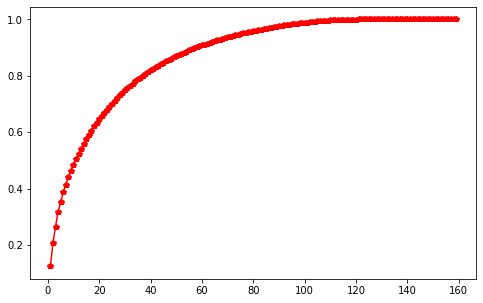

In [40]:
plt.figure(figsize=(8,5))
plt.plot(range(1, X_train_pca.shape[1]+1), pca.explained_variance_ratio_.cumsum(), marker='p', color='r')
plt.show()

In [41]:
pca = PCA(80)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [42]:
# Logistic Regression with dimensionality reduction
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)
lry_pred_pca = lr_pca.predict(X_test_pca)

# RandomForest with dimensionality reduction
rf_pca = RandomForestClassifier()
rf_pca.fit(X_train_pca, y_train)
rfy_pred_pca = rf_pca.predict(X_test_pca)

# Support Vector with dimensionality reduction
svc = SVC(kernel='rbf')
svc.fit(X_train_pca, y_train)
svcy_pred_pca = svc.predict(X_test_pca)

In [43]:
print(f"Accuracy for Logistic Reg after pca: {accuracy_score(y_test, lry_pred_pca)}")
print(f"Accuracy for RandomForest after pca: {accuracy_score(y_test, rfy_pred_pca)}")
print(f"Accuracy for Support Vector after pca: {accuracy_score(y_test, svcy_pred_pca)}")

Accuracy for Logistic Reg after pca: 0.8835429905330048
Accuracy for RandomForest after pca: 0.9307482816755285
Accuracy for Support Vector after pca: 0.9184282194267929


In [44]:
print(f"Classification Report for Logistic Reg with pca: {classification_report(y_test, lry_pred_pca)}")
print(f"Classification Report for RandomForest with pca: {classification_report(y_test, rfy_pred_pca)}")
print(f"Classification Report for Support Vector with pca: {classification_report(y_test, svcy_pred_pca)}")

Classification Report for Logistic Reg with pca:               precision    recall  f1-score   support

           0       0.91      0.93      0.92      5571
           1       0.80      0.77      0.79      2140

    accuracy                           0.88      7711
   macro avg       0.86      0.85      0.85      7711
weighted avg       0.88      0.88      0.88      7711

Classification Report for RandomForest with pca:               precision    recall  f1-score   support

           0       0.93      0.98      0.95      5571
           1       0.93      0.81      0.87      2140

    accuracy                           0.93      7711
   macro avg       0.93      0.89      0.91      7711
weighted avg       0.93      0.93      0.93      7711

Classification Report for Support Vector with pca:               precision    recall  f1-score   support

           0       0.94      0.95      0.94      5571
           1       0.87      0.84      0.85      2140

    accuracy                     

### Conclusion:
- Random Forest with pca performing best for this dataset with good precision and Recall.
- Logistic Regression is performing well without pca.